# Module 2 Exercise 1 - Remission length in AML

## Overview
In this exercise, you will perform a survival analysis on clinical trial data studying the effect of maintenance chemotherapy on remission lengths of acute myelogenous leukaemia.

## File Format

The data are located in the resources subfolder of module 2, in a file named `aml.csv`.

Documentation on the dataset is [here](../resources/aml.html).

## Required Output
You will respond to the questions located in the Quiz for this exercise in the Canvas site for this course.
        
## Grading
There are two parts to submission of this exercise. The first is submission of this notebook, and is worth 10 points. Not submitting code will result in a loss of 10 points. Submitting code that is not functional will result in a loss of 5 points.  

The Kaplan-Meier plot in this notebook will be assessed for correctness.  If the plot is not functionally correct, 2.5 points will be deducted.  Functionally correct means that each group is properly plotted in one chart, with confidence intervals, and the probability data plotted in the charts are accurate.  The look, size, and colors in the plot will not be graded.

The second part of the exercise is submission of the answers via the associated Canvas quiz. Each correct answer on the Canvas Quiz is worth 2 points.

Any numeric answer typed into Canvas will be considered correct if it is within $\pm$ 1% from the reference answer.  Answers in which you select a given choice will be graded based on the identified correct choice(s).  For multi-select, partial credit is given if a portion of the correct answers are selected.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install lifelines

     |████████████████████████████████| 358kB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 61kB 17.4MB/s eta 0:00:01
     |████████████████████████████████| 829kB 12.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 9.8MB/s eta 0:00:01
  Created wheel for autograd: filename=autograd-1.3-cp37-none-any.whl size=47990 sha256=c0699697683d3afae55fe0174f2d5431bb8b6d9a5ad4c0a00124886aa0969991
  Stored in directory: /home/dcphw2/.cache/pip/wheels/42/62/66/1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4034 sha256=72717495e6dc2be8a95c32fc5252f625c1ad09dae4e0838bb17b0cb21ae2a389
  Stored in directory: /home/dcphw2/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491057 sha256=99b95a3cbcdae12bbb80fa98d11b029533f3c9562f88d65538c4ab370ac3adf8
  Stored in directory: /home/dcphw2/

## Load the data

In [11]:
# your code here

data = pd.read_csv('../resources/aml.csv', index_col=0)

data.head()

,time,cens,group
1,9,1,1
2,13,1,1
3,13,0,1
4,18,1,1
5,23,1,1


## Create an event table for the aml data

In [5]:
# your code here

from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations = data['time'], event_observed = data['cens'])

event_table = kmf.event_table

display(event_table)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,23,23
5.0,2,2,0,0,23
8.0,2,2,0,0,21
9.0,1,1,0,0,19
12.0,1,1,0,0,18
13.0,2,1,1,0,17
16.0,1,0,1,0,15
18.0,1,1,0,0,14
23.0,2,2,0,0,13


## Quiz 1 Question 1

How many censored events are in the data?

In [6]:
# your code here

print(event_table['censored'].sum())

5


## Quiz 1 Question 2
What is the Cumulative probability of not having a relapse at time point 31?


In [8]:
# your code here

event_table['S'] = (event_table['at_risk'] - event_table['observed']) / event_table['at_risk']
event_table['cumulative_S'] = kmf.survival_function_

event_table

# 0.386473

,removed,observed,censored,entrance,at_risk,S,cumulative_S
event_at,,,,,,,
0.0,0,0,0,23,23,1.000000,1.000000
5.0,2,2,0,0,23,0.913043,0.913043
8.0,2,2,0,0,21,0.904762,0.826087
9.0,1,1,0,0,19,0.947368,0.782609
12.0,1,1,0,0,18,0.944444,0.739130
13.0,2,1,1,0,17,0.941176,0.695652
16.0,1,0,1,0,15,1.000000,0.695652
18.0,1,1,0,0,14,0.928571,0.645963
23.0,2,2,0,0,13,0.846154,0.546584


## Quiz 1 Question 3
What is the probability for not having a relapse at just time point 12?

In [ ]:
# your code here

#0.944444

## Display a Kaplan-Meier Curve
Show the probabilities for each group separately, along with their confidence intervals.

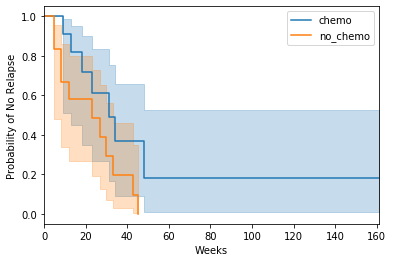

In [13]:
# your code here

kmf_chemo = KaplanMeierFitter()
kmf_no_chemo = KaplanMeierFitter()

data_chemo = data[data['group'] == 1]
data_no_chemo = data[data['group'] == 2]

kmf_chemo.fit(durations = data_chemo['time'], event_observed = data_chemo['cens'], label='chemo')
kmf_no_chemo.fit(durations = data_no_chemo['time'], event_observed = data_no_chemo['cens'], label='no_chemo')

kmf_chemo.plot()
kmf_no_chemo.plot()

_ = plt.xlabel('Weeks')
_ = plt.ylabel('Probability of No Relapse')

## Quiz 1 Question 4

Using the log-rank method, do we reject the Null hypothesis that there is no difference in the survival distribution between two groups, using $\alpha$ = 0.05?

In [15]:
# your code here
from lifelines.statistics import logrank_test

results = logrank_test(data_chemo['time'], data_no_chemo['time'], event_observed_A=data_chemo['cens'],
                       event_observed_B=data_no_chemo['cens'])

results.print_summary()
print(results.p_value)

# We accept the null hypothethis

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.40 0.07      3.94

0.06533932204050484


## Quiz 1 Question 5
Under the Cox Proportional Hazard model, using  𝛼  = 0.10, does the hazard ratio show an increase in risk for the maintenance chemotherapy group over the control group?

In [17]:
# your code here
from lifelines import CoxPHFitter

cph = CoxPHFitter()

cph.fit(data[['time', 'cens', 'group']], duration_col='time', event_col='cens')

cph.print_summary()

# The hazard ratio shows an increase in risk for the control group

<lifelines.CoxPHFitter: fitted with 23 total observations, 5 right-censored observations>
             duration col = 'time'
                event col = 'cens'
      baseline estimation = breslow
   number of observations = 23
number of events observed = 18
   partial log-likelihood = -41.03
         time fit was run = 2022-01-26 23:50:54 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
group       0.92       2.50       0.51            -0.09             1.92                 0.92                 6.81

             z    p   -log2(p)
covariate                     
group     1.79 0.07       3.76
---
Concordance = 0.62
Partial AIC = 84.07
log-likelihood ratio test = 3.38 on 1 df
-log2(p) of ll-ratio test = 3.93

## Quiz 1 Question 6
What is the hazard ratio from the Cox Proportional Hazards model, assuming 𝛼 = 0.10?

In [ ]:
# your code here

# 2.50